In [7]:
import pandas as pd
import numpy as np 
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import cv2


In [8]:
df = pd.read_csv("./dataset/annotations_train_norm.csv")

In [9]:
v = (df.iloc[1000,2:12].to_numpy()*np.array([1,2,3,4,5,6,7,8,9,19])).sum()
val = v 
v = np.int_(0) if v < 5 else np.int_(1)
(type(val),type(v))

(numpy.float64, numpy.int64)

In [10]:
predic = pd.read_csv("./pred/pred_nima_distrib_test.txt", sep=" ")
predic_bin = pd.read_csv("./pred/pred_bin.txt", sep=" ")
predic_reg = pd.read_csv("./pred/pred_reg.txt", sep=" ")


In [11]:
bin_pred = []
bin_pred_bin = []
bin_pred_reg = []
bin_gt = []

for i in range(len(predic.iloc[:, 2])):
    bin_pred_bin.append(1 if predic_bin.iloc[i,2] > predic_bin.iloc[:,2].mean() else 0)
    bin_pred_reg.append(1 if predic_reg.iloc[i,2] > 5 else 0)
    bin_pred.append(1 if predic.iloc[i,2] > 5 else 0)
    bin_gt.append(1 if predic.iloc[i,8] > 5 else 0)

num_distrib = 0
num_bin = 0
num_reg = 0
for j in range(len(predic.iloc[:, 2])):
    if bin_pred[j] != bin_gt[j]: num_distrib += 1
    if bin_pred_bin[j] != bin_gt[j]: num_bin += 1
    if bin_pred_reg[j] != bin_gt[j]: num_reg += 1
    
[num_distrib,num_bin,num_reg, 1 - num_distrib/len(predic.iloc[:, 2]), 1 - num_bin/len(predic.iloc[:, 2]),  1 - num_reg/len(predic.iloc[:, 2])]

[3686, 5183, 4025, 0.7622242291317249, 0.6656560443813702, 0.7403560830860534]

In [12]:
np.corrcoef(predic_bin.iloc[:,2].to_numpy(), predic.iloc[:,8].to_numpy()),

(array([[1.        , 0.56150536],
        [0.56150536, 1.        ]]),)

In [13]:
coef, p = spearmanr(predic_reg.iloc[:,2].to_numpy(), predic.iloc[:,8].to_numpy())
[coef, p]

[0.5095082987334664, 0.0]

In [ ]:
sum1 = reg_sorted['mean_diff'].sum()
sum2 = bin_sorted['mean_diff'].sum()
sum1, sum2
# reg_sorted
# bin_sorted


In [15]:
predic['mean_diff'] = predic['mean_gt'] - predic['mean_pred']
predic['mean_diff'] = predic['mean_diff'].abs()
sorted = predic.sort_values(by=['mean_diff'])
sorted

,ID,.,mean_pred,..1,..2,std_pred,..3,..4,mean_gt,mean_diff
947,78682,mean:,6.056,|,std:,1.515,|,GT:,6.056,0.000
10605,574151,mean:,6.031,|,std:,1.460,|,GT:,6.031,0.000
729,795349,mean:,5.178,|,std:,1.510,|,GT:,5.178,0.000
4000,664985,mean:,5.364,|,std:,1.401,|,GT:,5.364,0.000
13124,904839,mean:,5.633,|,std:,1.498,|,GT:,5.632,0.001
...,...,...,...,...,...,...,...,...,...,...
10945,406241,mean:,5.669,|,std:,1.363,|,GT:,2.977,2.692
10956,409283,mean:,5.513,|,std:,1.419,|,GT:,2.801,2.712
11032,409379,mean:,5.309,|,std:,1.452,|,GT:,2.567,2.742
10996,408773,mean:,5.819,|,std:,1.444,|,GT:,3.004,2.815


In [83]:
predic_sorted[predic_sorted['ID']==406241]['std_pred'].values[0]
# predic_sorted.loc[1][3]

1.3630000000000002

In [ ]:
high_5 = predic_sorted.iloc[:5,0]
low_5 = predic_sorted.iloc[-5:,0]
# [np.array(high_5), np.array(low_5)]

fig = plt.figure(figsize=(10,10))

path = './dataset/images/'
num_col = 0
for i in list(high_5):
    num_col += 1
    path_img = path + str(i) + '.jpg'
#     print(path_img)
    img = cv2.imread(path_img)
    
    ax = fig.add_subplot(5,1,num_col)
    ax.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    v1 = predic_sorted.loc[predic_sorted['ID']==i]['mean_pred'].values[0]
    v2 = predic_sorted.loc[predic_sorted['ID']==i]['std_pred'].values[0]
    v3 = predic_sorted.loc[predic_sorted['ID']==i]['mean_gt'].values[0]
#     title = "predict_mean:" + str(v1) + "||predict_std:" + str(v2) + "||gT_mean:" + str(v3)
    title = "predict_mean:{:.3f}||predict_std:{:.3f}||gT_mean:{:.3f}".format(v1,v2,v3)
#     title = "img{}".format(num_col)
#     print(v1,v2,v3)
#     plt.xticks([])  # x = None 
#     plt.yticks([])  # y = None
    ax.set_title(title) 


    ax.axis("off")

plt.show()
fig.savefig("predic_high.png")

In [110]:
labels = pd.read_csv("./dataset/annotations.csv", sep=" ")
labels

,"ID,0,1,2,3,4,5,6,7,8,9,tag1,tag2,challengeID"
0,"953958,10,7,15,26,26,21,10,8,1,2,1,21,1396"
1,"954184,0,0,4,8,41,56,10,3,4,0,0,0,1396"
2,"954113,0,1,4,6,48,37,23,5,2,2,15,21,1396"
3,"953980,0,3,6,15,57,39,6,1,1,1,22,38,1396"
4,"954175,0,0,5,13,40,53,14,1,3,1,15,65,1396"
...,...
255517,"56938,1,7,17,40,84,56,31,13,6,1,9,0,181"
255518,"57304,1,0,8,25,50,65,55,26,18,7,1,18,181"
255519,"56711,0,0,8,11,26,47,48,56,30,22,9,24,181"
255520,"57303,0,2,19,30,75,60,30,25,5,2,22,0,181"


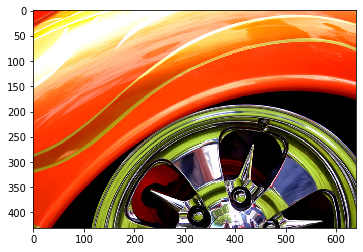

In [20]:
def mknoise(img, std, h, w):
    for i in range(height): 
        for a in range(width): 
            make_noise = np.random.normal() 
            set_noise = std * make_noise 
            img_noise[i][a] = gray[i][a] + set_noise

    return img_noise

base_img = cv2.imread('./dataset/images/78682.jpg')
height, width, _ = base_img.shape
noise1 = mknoise(height, width)
noise2 = mknoise(height, width)
noise3 = mknoise(height, width)

plt.imshow(cv2.cvtColor(base_img,cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
height, width

(431, 640)